In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from models.multiscale_vae import MultiscaleVariationalAutoencoder

import utils
import utils.transform

Using TensorFlow backend.


In [2]:
# run params
SECTION = "vae"
RUN_ID = "0002"
DATA_NAME = "digits"
BASE_DIR= "./run"
BASE_DIR_SECTION = "{0}/{1}/".format(BASE_DIR, SECTION)
RUN_FOLDER = BASE_DIR_SECTION + "_".join([RUN_ID, DATA_NAME])

if not os.path.exists(BASE_DIR):
    os.mkdir(BASE_DIR)
    
if not os.path.exists(BASE_DIR_SECTION):
    os.mkdir(BASE_DIR_SECTION)
    
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, "viz"))
    os.mkdir(os.path.join(RUN_FOLDER, "images"))
    os.mkdir(os.path.join(RUN_FOLDER, "weights"))

mode = "build"

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

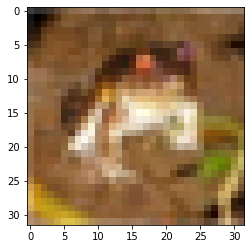

In [4]:
# Display original
plt.figure()
plt.imshow(x_train[0,:,:,:]) 
plt.show()  

In [5]:
multiscale_vae = MultiscaleVariationalAutoencoder(
    input_dims=(32,32,3), 
    levels=3, 
    z_dims=[64, 128, 256])

2020-05-09 12:17:58,418 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



2020-05-09 12:17:58,424 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



2020-05-09 12:17:58,433 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



2020-05-09 12:17:58,434 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.



2020-05-09 12:17:58,514 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



2020-05-09 12:17:58,537 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



2020-05-09 12:17:58,572 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



2020-05-09 12:17:58,573 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



2020-05-09 12:17:58,574 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



2020-05-09 12:17:58,761 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



2020-05-09 12:17:58,763 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.



2020-05-09 12:17:58,903 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



2020-05-09 12:17:59,248 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2020-05-09 12:17:59,303 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2020-05-09 12:17:59,835 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2020: The name tf.image.resize_bilinear is deprecated. Please use tf.compat.v1.image.resize_bilinear instead.



In [6]:
LEARNING_RATE = 0.001
R_LOSS_FACTOR = 1000
KL_LOSS_FACTOR = 10

In [7]:
multiscale_vae.compile(
    learning_rate=LEARNING_RATE, 
    r_loss_factor=R_LOSS_FACTOR,
    kl_loss_factor=KL_LOSS_FACTOR
)

2020-05-09 12:18:01,078 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [8]:
EPOCHS = 100
BATCH_SIZE = 32
PRINT_EVERY_N_BATCHES = 1000
INITIAL_EPOCH = 0

In [9]:
# serialize model to JSON
model_json = multiscale_vae.model_predict.to_json()
with open("model_predict.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
multiscale_vae.train(     
    x_train, 
    batch_size = BATCH_SIZE, 
    epochs = EPOCHS, 
    run_folder = RUN_FOLDER, 
    print_every_n_batches = PRINT_EVERY_N_BATCHES, 
    initial_epoch = INITIAL_EPOCH,
    step_size=20,
    lr_decay=0.5
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2020-05-09 12:18:10,778 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2020-05-09 12:18:13,622 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



2020-05-09 12:18:13,626 tensorflow   WARNING From /home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
  128/50000 [..............................] - ETA: 1:16:11 - loss: 423.0104 - activation_1_loss: 14.7007 - activation_2_loss: 63.1794 - activation_3_loss: 345.1303 - activation_1_vae_r_loss: 14.7007 - activation_2_vae_r_loss: 63.1794 - activation_3_vae_r_loss: 345.1303

/home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.469115). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 145s 3ms/step - loss: 116.1599 - activation_1_loss: 7.4122 - activation_2_loss: 24.7323 - activation_3_loss: 84.0154 - activation_1_vae_r_loss: 7.4122 - activation_2_vae_r_loss: 24.7323 - activation_3_vae_r_loss: 84.0154

Epoch 00001: saving model to ./run/vae/0002_digits/weights/weights-001-116.16.h5

Epoch 00001: saving model to ./run/vae/0002_digits/weights/weights.h5
Epoch 2/100
50000/50000 [==============================] - 134s 3ms/step - loss: 88.1315 - activation_1_loss: 6.2002 - activation_2_loss: 20.1817 - activation_3_loss: 61.7495 - activation_1_vae_r_loss: 6.2002 - activation_2_vae_r_loss: 20.1817 - activation_3_vae_r_loss: 61.7495

Epoch 00002: saving model to ./run/vae/0002_digits/weights/weights-002-88.13.h5

Epoch 00002: saving model to ./run/vae/0002_digits/weights/weights.h5
Epoch 3/100
50000/50000 [==============================] - 134s 3ms/step - loss: 81.2313 - activation_1_loss: 5.8124 - activation_2_loss: 18.7244 - 

50000/50000 [==============================] - 134s 3ms/step - loss: 63.0243 - activation_1_loss: 4.4511 - activation_2_loss: 13.7182 - activation_3_loss: 44.8549 - activation_1_vae_r_loss: 4.4511 - activation_2_vae_r_loss: 13.7182 - activation_3_vae_r_loss: 44.8549

Epoch 00020: saving model to ./run/vae/0002_digits/weights/weights-020-63.02.h5

Epoch 00020: saving model to ./run/vae/0002_digits/weights/weights.h5
Epoch 21/100
50000/50000 [==============================] - 134s 3ms/step - loss: 62.7495 - activation_1_loss: 4.4248 - activation_2_loss: 13.6533 - activation_3_loss: 44.6714 - activation_1_vae_r_loss: 4.4248 - activation_2_vae_r_loss: 13.6533 - activation_3_vae_r_loss: 44.6714

Epoch 00021: saving model to ./run/vae/0002_digits/weights/weights-021-62.75.h5

Epoch 00021: saving model to ./run/vae/0002_digits/weights/weights.h5
Epoch 22/100
50000/50000 [==============================] - 134s 3ms/step - loss: 62.5625 - activation_1_loss: 4.4018 - activation_2_loss: 13.6026 - 

Epoch 39/100
50000/50000 [==============================] - 134s 3ms/step - loss: 60.7244 - activation_1_loss: 4.2095 - activation_2_loss: 13.1479 - activation_3_loss: 43.3669 - activation_1_vae_r_loss: 4.2095 - activation_2_vae_r_loss: 13.1479 - activation_3_vae_r_loss: 43.3669

Epoch 00039: saving model to ./run/vae/0002_digits/weights/weights-039-60.72.h5

Epoch 00039: saving model to ./run/vae/0002_digits/weights/weights.h5
Epoch 40/100
50000/50000 [==============================] - 134s 3ms/step - loss: 60.6293 - activation_1_loss: 4.1982 - activation_2_loss: 13.1197 - activation_3_loss: 43.3114 - activation_1_vae_r_loss: 4.1982 - activation_2_vae_r_loss: 13.1197 - activation_3_vae_r_loss: 43.3114

Epoch 00040: saving model to ./run/vae/0002_digits/weights/weights-040-60.63.h5

Epoch 00040: saving model to ./run/vae/0002_digits/weights/weights.h5
Epoch 41/100
50000/50000 [==============================] - 134s 3ms/step - loss: 60.4768 - activation_1_loss: 4.1812 - activation_2_los

Epoch 58/100
50000/50000 [==============================] - 134s 3ms/step - loss: 59.9448 - activation_1_loss: 4.1198 - activation_2_loss: 12.9729 - activation_3_loss: 42.8521 - activation_1_vae_r_loss: 4.1198 - activation_2_vae_r_loss: 12.9729 - activation_3_vae_r_loss: 42.8521

Epoch 00058: saving model to ./run/vae/0002_digits/weights/weights-058-59.94.h5

Epoch 00058: saving model to ./run/vae/0002_digits/weights/weights.h5
Epoch 59/100
50000/50000 [==============================] - 134s 3ms/step - loss: 59.9750 - activation_1_loss: 4.1200 - activation_2_loss: 12.9671 - activation_3_loss: 42.8879 - activation_1_vae_r_loss: 4.1200 - activation_2_vae_r_loss: 12.9671 - activation_3_vae_r_loss: 42.8879

Epoch 00059: saving model to ./run/vae/0002_digits/weights/weights-059-59.97.h5

Epoch 00059: saving model to ./run/vae/0002_digits/weights/weights.h5
Epoch 60/100
50000/50000 [==============================] - 134s 3ms/step - loss: 59.9449 - activation_1_loss: 4.1062 - activation_2_los

In [ ]:
results = multiscale_vae.model_predict.predict(x_train[0:1,:,:,:])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[0,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[0,:,:,:])
plt.xlabel("recovery")
plt.show() 